   #                             Neural Networks Module Project

### PART - A

#### DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.

In [4]:
pip install tensorflow


                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                            0.0/276.6 MB 330.3 kB/s eta 0:13:58
                                            0.0/276.6 MB 326.8 kB/s eta 0:14:07
                                            0.1/276.6 MB 476.3 kB/s eta 0:09:41
                                            0.1/276.6 MB 602.4 kB/s eta 0:07:39
                                            0.2/276.6 MB 778.2 kB/s eta 0:05:56
                                            0.2/276.6 MB 811.5 kB/s eta 0:05:41
                                            0.2/276.6 MB 811.5 kB/s eta 0:05:41
                                            0.2/276.6 MB 811.5 kB/s eta 0:05:41
                                            0.2/276.6 MB 811.5 kB/s eta 0:05:41
                                            0.2/276.6 MB 811.5 kB/s eta 0:05:41
                                            0.2/276.6

In [6]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.13.0'

### 1. Data import and Understanding

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

### Q1. A

In [13]:
df = pd.read_csv('NN Project Data - Signal.csv')

In [14]:
df.shape

(1599, 12)

In [15]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. B

#### Check for missing values and print percentage for each attribute.

In [17]:
# Data type of each attribute 
df.info()   # it gives information about the data and data types of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the parameters are floating point and the signal strength is an integer.

Apart from Signal Strength rest all features are floating point.

In [19]:
# Checking the presence of missing values
null_counts = df.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


There are no null values in the data

In [20]:
# 5 point summary of numerical attributes
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Looking the 11 parameters : Parameter 3 ranges between 0 and 1. Maximum value of Parameter 5 is 0.6 Parameter 8 has a very low range between 0.9 and 1.004 Standard deviation is lowest for Parameter 8, it is 0.001887 'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

### Q1. C

Check for presence of duplicate records in the dataset and impute with appropriate method.

In [21]:
df.duplicated().sum()

240

In [23]:
df.drop_duplicates(keep='first',inplace=True)

In [24]:
df.duplicated().sum()

0

### Q1. D  
Visualise distribution of the target variable.

<Axes: >

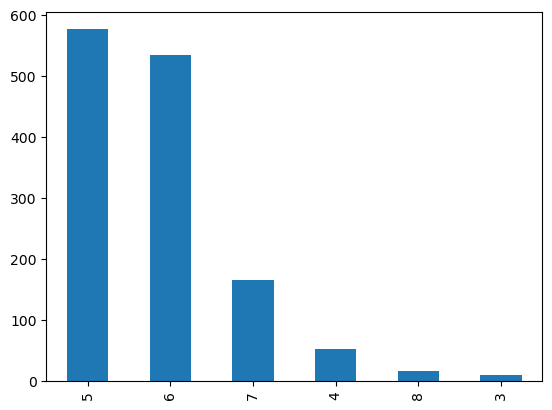

In [25]:
df.Signal_Strength.value_counts().plot(kind='bar')

### Q1. E 
Share insights from the initial data analysis (at least 2).

- Signal strength is biased towards 5 & 6.
- Range of sensors is different for different attributes, hence normalization would be required.

### 2. Data preprocessing

### Q2.A
- Split the data into X & Y.

In [26]:
X=df.drop('Signal_Strength',axis=1)   # Independent variables
Y=df['Signal_Strength']               # Target variable

### Q2. B
- Split the data into train & test with 70:30 proportion.

In [27]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

### Q2. C
- Print shape of all the 4 variables and verify if train and test data is in sync.

In [28]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(951, 11)
(951,)
(408, 11)
(408,)


### Q2. D
- Normalise the train and test data with appropriate method.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_Train)
X_Train_S = scaler.transform(X_Train)
X_Test_S = scaler.transform(X_Test)

### Q3. E
- Transform Labels into format acceptable by Neural Network

In [30]:
Y_Train = tf.keras.utils.to_categorical(Y_Train)
Y_Test = tf.keras.utils.to_categorical(Y_Test)

### 3. Model Training & Evaluation using Neural Network
### Q3. A
- Design a Neural Network to train a classifier.

In [34]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout

In [35]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))
NN_model_Regressor.add(BatchNormalization())

NN_model_Regressor.add(Dense(9,activation='relu'))

# The Output Layer :
NN_model_Regressor.add(Dense(9,activation='softmax')) 

# Compile the network :
NN_model_Regressor.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
Total params: 374 (1.46 KB)
Trainable params: 352 (1.38 KB)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


### Q3. B
- Train the classifier using previously designed Architecture

In [36]:
# NN_model_Regressor.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['MeanSquaredError'])

In [37]:
model_train = NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=100, batch_size=128)

Epoch 1/100
8/8 [==============================] - 3s 54ms/step - loss: 0.2007 - mean_squared_error: 0.1063 - val_loss: 0.1974 - val_mean_squared_error: 0.0986
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1970 - mean_squared_error: 0.1016 - val_loss: 0.1968 - val_mean_squared_error: 0.0980
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1933 - mean_squared_error: 0.0979 - val_loss: 0.1961 - val_mean_squared_error: 0.0974
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1898 - mean_squared_error: 0.0949 - val_loss: 0.1954 - val_mean_squared_error: 0.0967
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1861 - mean_squared_error: 0.0921 - val_loss: 0.1945 - val_mean_squared_error: 0.0959
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1822 - mean_squared_error: 0.0900 - val_loss: 0.1935 - val_mean_squared_error: 0.0949
Epoch 7/100
8/8 [=======================

### Q3. C
- Plot 2 separate visuals.
    - i. Training Loss and Validation Loss
    - ii. Training Accuracy and Validation Accuracy

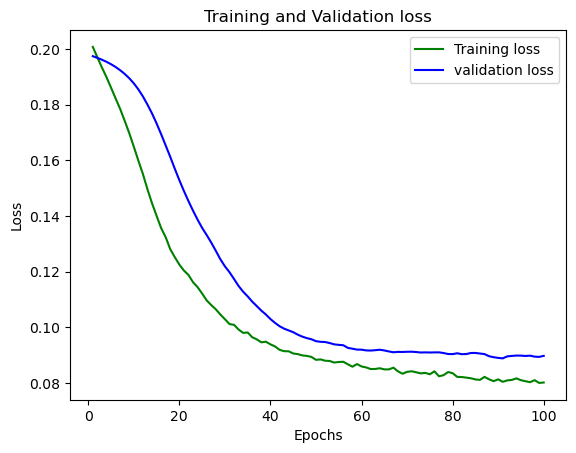

In [38]:
loss_train = NN_model_Regressor.history.history['loss']
loss_val = NN_model_Regressor.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

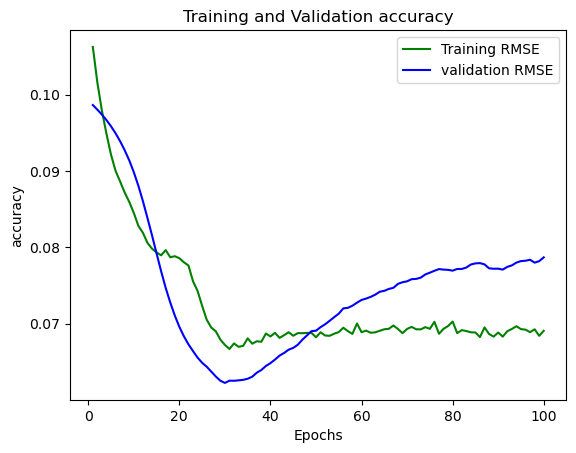

In [39]:
Acc_train = NN_model_Regressor.history.history['mean_squared_error']
Acc_val = NN_model_Regressor.history.history['val_mean_squared_error']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training RMSE')
plt.plot(epochs, Acc_val, 'b', label='validation RMSE')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Q3. D
- Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [40]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())

NN_model.add(Dense(9,activation='relu'))

NN_model.add(Dense(9,activation='relu'))
# The Output Layer :
NN_model.add(Dense(9,activation='softmax')) 

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_1 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 9)                 108       
                                                                 
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
 dense_6 (Dense)             (None, 9)                 90        
                                                                 
Total params: 464 (1.81 KB)
Trainable params: 442 (1.73 KB)
Non-trainable params: 22 (88.00 Byte)
______________________

In [41]:
NN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [42]:
model_train = NN_model.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 2s 12ms/step - loss: 1.9296 - accuracy: 0.3712 - val_loss: 2.0417 - val_accuracy: 0.5000
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.6636 - accuracy: 0.5089 - val_loss: 1.8684 - val_accuracy: 0.5466
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 1.4412 - accuracy: 0.5542 - val_loss: 1.6897 - val_accuracy: 0.5662
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2920 - accuracy: 0.5594 - val_loss: 1.5527 - val_accuracy: 0.5833
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1980 - accuracy: 0.5762 - val_loss: 1.4480 - val_accuracy: 0.5931
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 1.1333 - accuracy: 0.5689 - val_loss: 1.3480 - val_accuracy: 0.5956
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1026 - accuracy: 0.5668 - val_loss: 1.2800 - val_accuracy: 0.5907
Epoch 8/100

Epoch 59/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8617 - accuracy: 0.6309 - val_loss: 1.0306 - val_accuracy: 0.5760
Epoch 60/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.6341 - val_loss: 1.0270 - val_accuracy: 0.5833
Epoch 61/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8732 - accuracy: 0.6446 - val_loss: 1.0214 - val_accuracy: 0.5907
Epoch 62/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8689 - accuracy: 0.6383 - val_loss: 1.0245 - val_accuracy: 0.5907
Epoch 63/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8623 - accuracy: 0.6393 - val_loss: 1.0318 - val_accuracy: 0.5760
Epoch 64/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8633 - accuracy: 0.6383 - val_loss: 1.0254 - val_accuracy: 0.5882
Epoch 65/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8712 - accuracy: 0.6193 - val_loss: 1.0294 - val_accuracy: 0.5833
Epoch 

### Q3. E
- E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

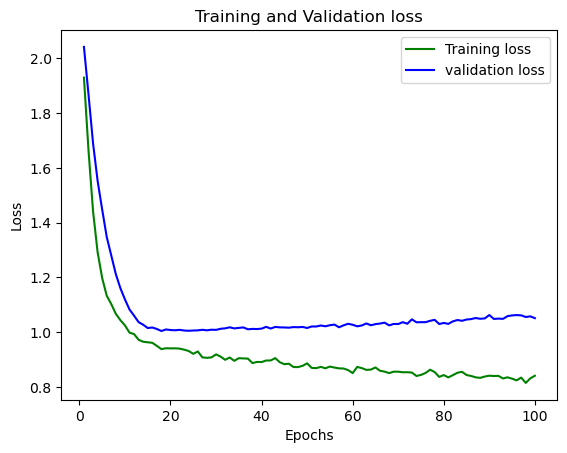

In [43]:
loss_train = NN_model.history.history['loss']
loss_val = NN_model.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

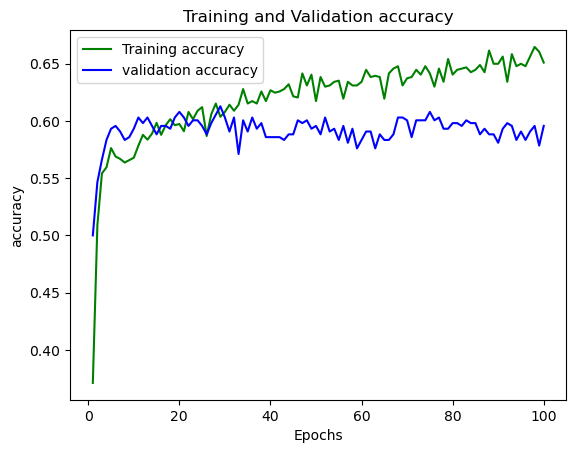

In [44]:
Acc_train = NN_model.history.history['accuracy']
Acc_val = NN_model.history.history['val_accuracy']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

- Loss in both training and testing data is gradual with batch size 128 whereas slope is steeper with batch size 32. 
- Accuracy improved by ~5% when additional hidden layer is introduced.

### _______________________________________________________________________________________

## PART B
#### DOMAIN: Autonomous Vehicles

#### CONTEXT: 
- A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.


- The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

#### DATA DESCRIPTION: 
- The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 

- Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

#### PROJECT OBJECTIVE: 
- To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### 1. Data Import and Exploration

In [47]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.13.0


In [48]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

### Q1. A
- Read the .h5 file and assign to a variable.

In [49]:
import h5py

# Open the file as readonly
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

### Q1. B
- Print all the keys from the .h5 file.

In [50]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Q1. C
- Split the data into X_train, X_test, Y_train, Y_test

In [51]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

### 2. Data Visualisation and preprocessing

### Q2. A 
- Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [52]:
X_train.shape

(42000, 32, 32)

In [53]:
X_test.shape

(18000, 32, 32)

In [54]:
X_val.shape

(60000, 32, 32)

In [55]:
y_train.shape

(42000,)

In [56]:
y_test.shape

(18000,)

In [57]:
y_val.shape

(60000,)

- The training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.
The test dataset(X_test) has 18k records each record being 32x32 in size.
y_train, y_test contain label for the given image matrix.

### Q2. B
- Visualise first 10 images in train data and print its corresponding labels.

In [59]:
def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_train[i], cmap="gray")
        plt.axis('off')
    plt.show()
    print('label for each of the above image: %s' % (y_train[0:n]))

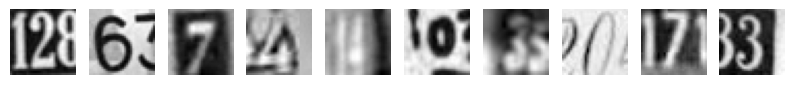

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [60]:
img_lab(10)

### Q2. C
- Reshape all the images with appropriate shape update the data in same variable.
### Q2. D 
- Normalise the images i.e. Normalise the pixel values. 

In [61]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


### Q2. E
- Transform Labels into format acceptable by Neural Network 
### Q2. F
- Print total Number of classes in the Dataset.

In [62]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


### 3. Model Training & Evaluation using Neural Network
### Q3.A
- Design a Neural Network to train a classifier.

In [63]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [64]:
# build the model
model = nn_model()

### Q3. B
- Train the classifier using previously designed Architecture (Use best suitable parameters).

In [65]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])  ### Loss function = Categorical cross entropy

In [66]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 5s - loss: 2.3047 - accuracy: 0.1047 - val_loss: 2.2898 - val_accuracy: 0.1346 - 5s/epoch - 32ms/step
Epoch 2/100
140/140 - 3s - loss: 2.1253 - accuracy: 0.2182 - val_loss: 1.9683 - val_accuracy: 0.2758 - 3s/epoch - 19ms/step
Epoch 3/100
140/140 - 3s - loss: 1.7939 - accuracy: 0.3615 - val_loss: 1.6458 - val_accuracy: 0.4417 - 3s/epoch - 19ms/step
Epoch 4/100
140/140 - 3s - loss: 1.5344 - accuracy: 0.4797 - val_loss: 1.4618 - val_accuracy: 0.5156 - 3s/epoch - 21ms/step
Epoch 5/100
140/140 - 3s - loss: 1.3658 - accuracy: 0.5496 - val_loss: 1.3479 - val_accuracy: 0.5558 - 3s/epoch - 19ms/step
Epoch 6/100
140/140 - 3s - loss: 1.2630 - accuracy: 0.5920 - val_loss: 1.2075 - val_accuracy: 0.6148 - 3s/epoch - 20ms/step
Epoch 7/100
140/140 - 3s - loss: 1.1821 - accuracy: 0.6238 - val_loss: 1.1396 - val_accuracy: 0.6426 - 3s/epoch - 21ms/step
Epoch 8/100
140/140 - 3s - loss: 1.1269 - accuracy: 0.6444 - val_loss: 1.0927 - val_accuracy: 0.6595 - 3s/epoch - 18ms/step
Epoch 9/

Epoch 67/100
140/140 - 3s - loss: 0.4814 - accuracy: 0.8490 - val_loss: 0.6616 - val_accuracy: 0.8077 - 3s/epoch - 19ms/step
Epoch 68/100
140/140 - 3s - loss: 0.4798 - accuracy: 0.8487 - val_loss: 0.6698 - val_accuracy: 0.8074 - 3s/epoch - 19ms/step
Epoch 69/100
140/140 - 3s - loss: 0.4720 - accuracy: 0.8518 - val_loss: 0.6592 - val_accuracy: 0.8088 - 3s/epoch - 19ms/step
Epoch 70/100
140/140 - 3s - loss: 0.4673 - accuracy: 0.8527 - val_loss: 0.6812 - val_accuracy: 0.8094 - 3s/epoch - 19ms/step
Epoch 71/100
140/140 - 3s - loss: 0.4718 - accuracy: 0.8505 - val_loss: 0.6561 - val_accuracy: 0.8106 - 3s/epoch - 19ms/step
Epoch 72/100
140/140 - 3s - loss: 0.4755 - accuracy: 0.8501 - val_loss: 0.6687 - val_accuracy: 0.8074 - 3s/epoch - 21ms/step
Epoch 73/100
140/140 - 3s - loss: 0.4614 - accuracy: 0.8530 - val_loss: 0.6782 - val_accuracy: 0.8066 - 3s/epoch - 21ms/step
Epoch 74/100
140/140 - 3s - loss: 0.4624 - accuracy: 0.8526 - val_loss: 0.6536 - val_accuracy: 0.8140 - 3s/epoch - 20ms/step


### Q3. C
- Evaluate performance of the model with appropriate metrics.

In [67]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6428887844085693
Accuracy: 0.8200555443763733


### Q3. D
- Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

Text(0.5, 1.0, 'Training and validation loss')

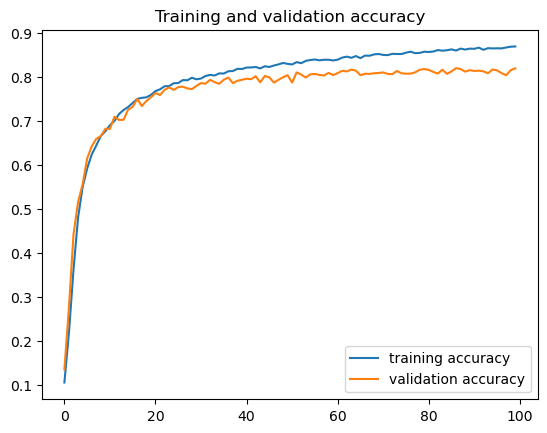

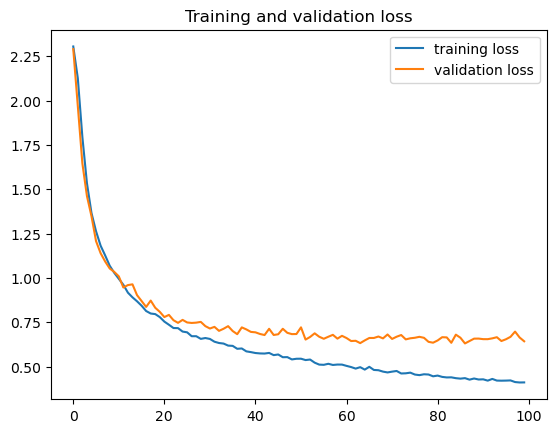

In [68]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 82%. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.                                            